In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [35]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-3.2.0               |           py36_0         770 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be 

In [2]:
# The code was removed by Watson Studio for sharing.

,Neighborhood,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Tampere Keskusta,61499978678,23774925726,2952,3098,3025,3168,3150,3222,3283,3403,3430
1,Epilä,61508759546,23703304730,2423,2248,2467,2573,2462,2509,2507,2581,2653
2,Tesoma,61485382303,23623391886,1811,1861,2079,1800,1562,1585,1658,1686,1548
3,Ikuri,61506673760,23647259572,2081,2140,2139,1990,2079,1837,1935,2130,1922
4,Lentavaniemi,61529896896,23685706856,1547,1683,2176,1399,1784,1768,2123,1708,1815


In [3]:
years = df_data_1[['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']]
df_data_1.dtypes


Neighborhood    object
Latitude         int64
Longitude        int64
2010             int64
2011             int64
2012             int64
2013             int64
2014             int64
2015             int64
2016             int64
2017             int64
2018             int64
dtype: object

In [14]:
df_data_1.set_index('Neighborhood', inplace=True)
df_data_1.head()

,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018
Neighborhood,,,,,,,,,,,
Tampere Keskusta,61499978678,23774925726,2952,3098,3025,3168,3150,3222,3283,3403,3430
Epilä,61508759546,23703304730,2423,2248,2467,2573,2462,2509,2507,2581,2653
Tesoma,61485382303,23623391886,1811,1861,2079,1800,1562,1585,1658,1686,1548
Ikuri,61506673760,23647259572,2081,2140,2139,1990,2079,1837,1935,2130,1922
Lentavaniemi,61529896896,23685706856,1547,1683,2176,1399,1784,1768,2123,1708,1815


In [19]:
import seaborn as sns
manse = df_data_1.transpose()
manse.drop(['Latitude', 'Longitude'], axis=0, inplace=True)
manse.head()


Neighborhood,Tampere Keskusta,Epilä,Tesoma,Ikuri,Lentavaniemi,Ylojarvi,Petsamo,Koilliskeskus,Kaukajarvi,Hervanta,Nekala,Hoytamo,Harmala,Pirkkala
2010,2952,2423,1811,2081,1547,1761,2529,2195,2034,1881,2012,1477,2076,1928
2011,3098,2248,1861,2140,1683,1960,2573,2282,2025,2032,2001,1719,2257,1946
2012,3025,2467,2079,2139,2176,1935,2736,2335,2048,1986,1948,1626,2446,2175
2013,3168,2573,1800,1990,1399,1692,2795,2309,2121,2032,2196,1682,2247,2089
2014,3150,2462,1562,2079,1784,1912,2696,2310,2063,2082,2223,1367,2253,2258


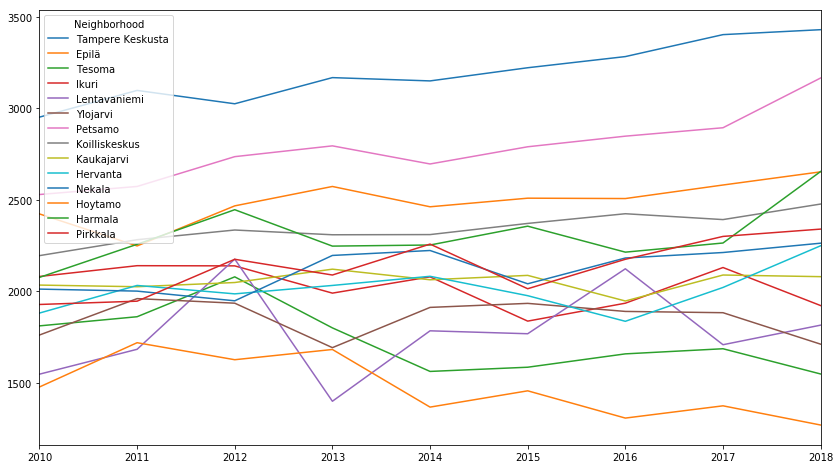

In [32]:
manse.plot(kind='line', figsize=(14, 8))
#manse.info()

In [43]:
import folium 
# create map of New York using latitude and longitude values
map_manse = folium.Map(location=[61.499978678, 23.774925726], zoom_start=10)

# add markers to map
for lat, lng in zip(df_data_1['Latitude']/1000000000, df_data_1['Longitude']/1000000000):
    label = 'local'
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manse)  
    
map_manse

